In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

## Minimum Variance Portfolio Backtest.

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 30
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.STATIC_FACTOR_MODEL.value(
    factor_cov_estimator=CovEstimators.HISTORICAL.value(),
    residual_cov_estimator=CovEstimators.QIS.value(),
)

In [4]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [5]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:40<00:00,  6.96it/s]


StrategyStatistics:
* final_nav = 6.500295
* geom_avg_total_r = 0.103461
* geom_avg_xs_r = 0.095683
* std_xs_r = 0.150434
* min_xs_r = -0.080811
* max_xs_r = 0.098568
* skew = 0.050542
* kurtosis = 13.418904
* max_dd = -0.326154
* sharpe = 0.636042
* alpha_buy_hold = 0.025890
* tracking_error_buy_hold = 0.128290
* ir_buy_hold = 0.201806
* factor_loadings = {'low_risk': 0.5173852085413214, 'momentum': -0.09410147170284602, 'quality': 0.001711680391602906, 'size': 0.020835539818834372, 'value': -0.15772098454225414, 'spx': 0.7655876339072546}
* alpha_benchmark = 0.028649
* alpha_benchmark_pvalue = 0.092185
* tracking_error_benchmark = 0.075121
* ir_benchmark = 0.381377
* ttest_pval = 0.421916
* levene_pval = 0.000000
* timing_ability_coef = -0.014945
* timing_ability_pval = 0.290023

In [6]:
result.std_xs_r, result.sharpe

(0.1504343467681968, 0.6360424363943906)

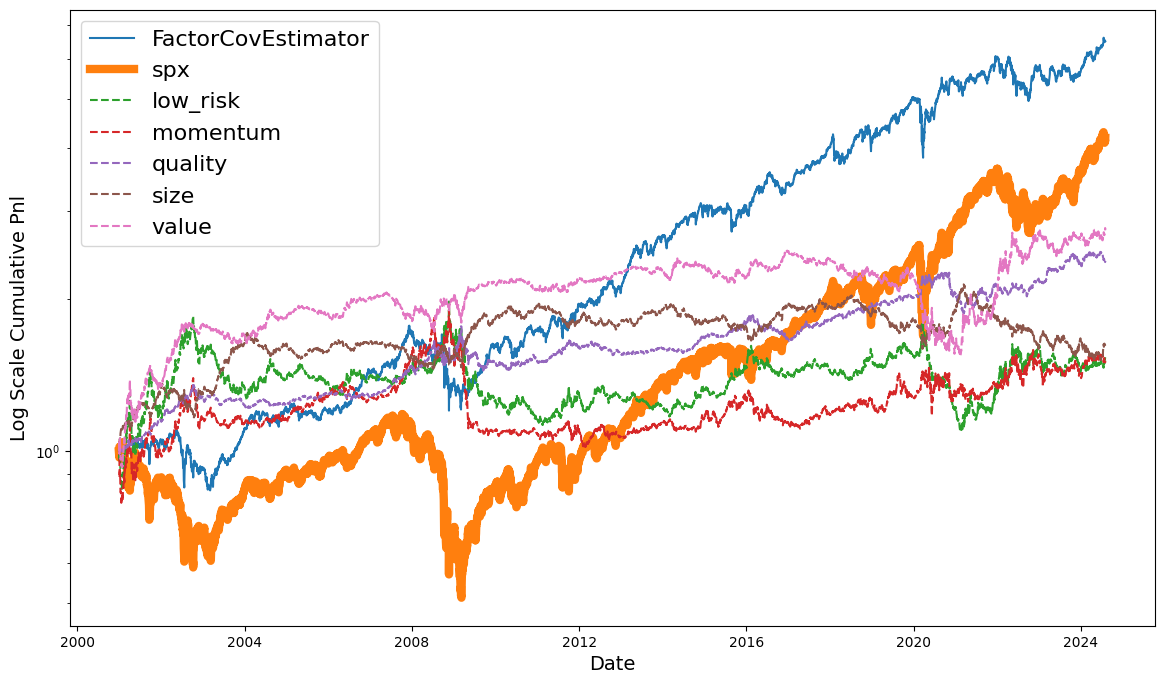

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

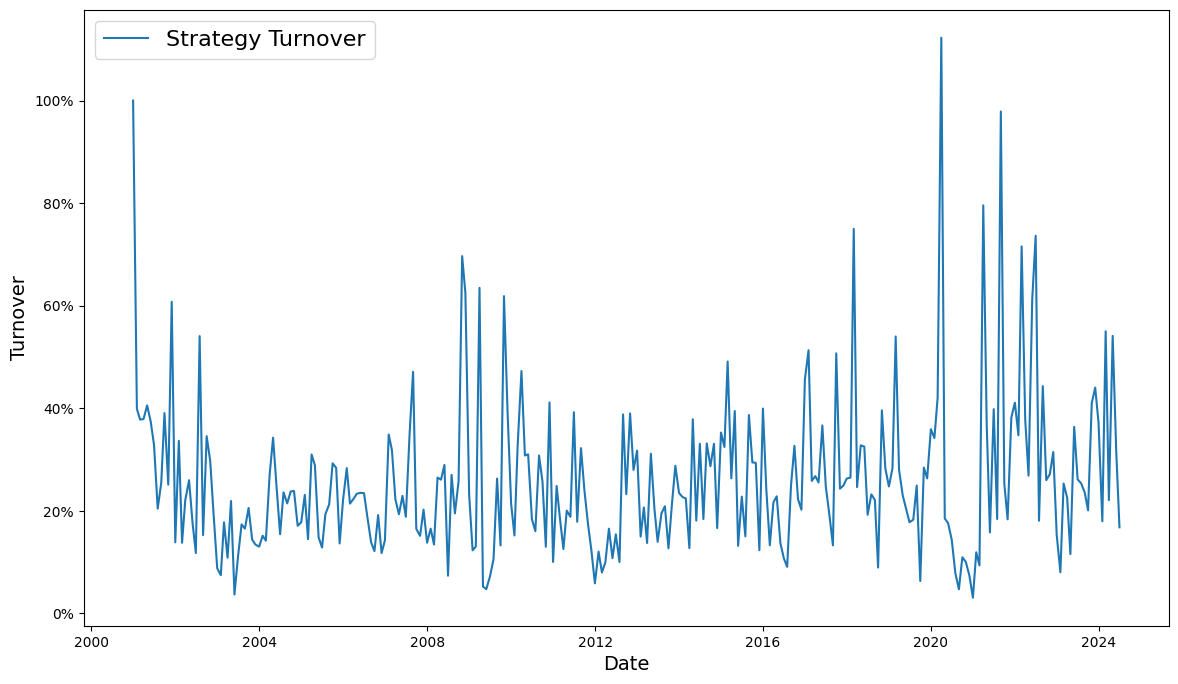

In [8]:
runner.plot_turnover()

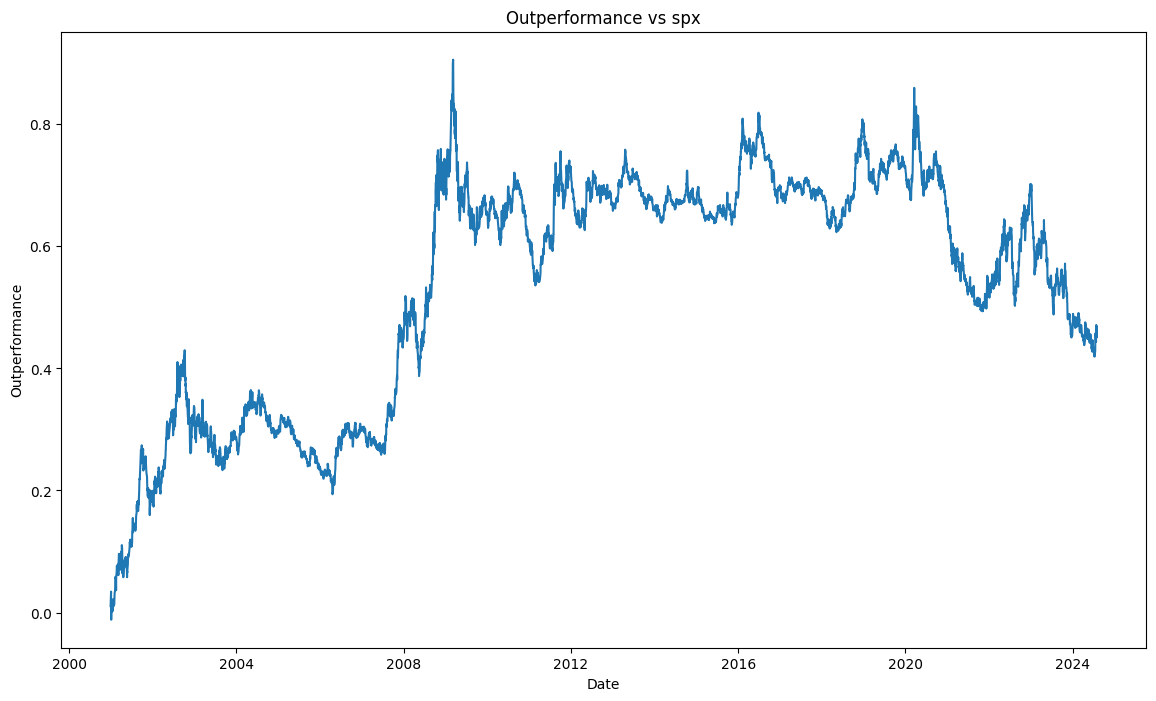

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")